This notebook opens the MUSE files and locates the SNe within them, plotting them in a folder.
This notebook also writes the MUSE galaxies and their filenames in ../Data/MUSEdata.csv

The MUSE files have this address: /data/fourier/sun.1608/PHANGS/MUSE/DR2.2/MUSEDAP/copt/



In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
from astropy.io import fits
import sys, os
# !{sys.executable} -m pip install aplpy
import numpy as np
import aplpy
from astropy.table import Table

In [3]:
# Organize MUSE galaxies and their information in MUSE table
# Filenames have following format:
# /data/fourier/sun.1608/PHANGS/MUSE/DR2.2/MUSEDAP/<copt OR 150pc OR 15asec>/<GALAXY>-<RES>_MAPS.fits

galaxies = ["IC5332", "NGC2835", "NGC0628", "NGC3351", "NGC1087", "NGC3627", "NGC1300", "NGC4254", "NGC1365",
            "NGC4303", "NGC1385", "NGC4321", "NGC1433", "NGC4535", "NGC1512", "NGC5068", "NGC1566", "NGC7496",
            "NGC1672"]

natRes = ["0.87", "1.15", "0.92", "1.05", "0.92", "1.05", "0.89", "0.89", "1.15", "0.78", "0.77", "1.16",
          "0.91", "0.56", "1.25", "1.04", "0.80", "0.89", "0.96"]

fileNamesNat, fileNames150pc, fileNames15asec = [],[],[]

for i in range(len(galaxies)):
    beg = "/data/fourier/sun.1608/PHANGS/MUSE/DR2.2/MUSEDAP/"
    end = "_MAPS.fits"
    
    fileNamesNat.append(beg + "copt/" + galaxies[i] + "-" + natRes[i] + "asec" + end)
    fileNames150pc.append(beg + "150pc/" + galaxies[i] + "-150pc" + end)
    fileNames15asec.append(beg + "15asec/" + galaxies[i] + "-15asec" + end)

MUSEtable = Table({"Galaxy":         galaxies, 
                   "MUSENatRes":     natRes, 
                   "MUSEmapNat":     fileNamesNat,
                   "MUSEmap150pc":   fileNames150pc,
                   "MUSEmap15asec":  fileNames15asec})

MUSEtable.sort("Galaxy")
MUSEtable.write('../Data/0.MUSEdata.csv', overwrite=True)  

MUSEtable


<Table length=19>
 Galaxy ...
  str7  ...
------- ...
 IC5332 ...
NGC0628 ...
NGC1087 ...
NGC1300 ...
NGC1365 ...
NGC1385 ...
NGC1433 ...
NGC1512 ...
NGC1566 ...
NGC1672 ...
NGC2835 ...
NGC3351 ...
NGC3627 ...
NGC4254 ...
NGC4303 ...
NGC4321 ...
NGC4535 ...
NGC5068 ...
NGC7496 ...

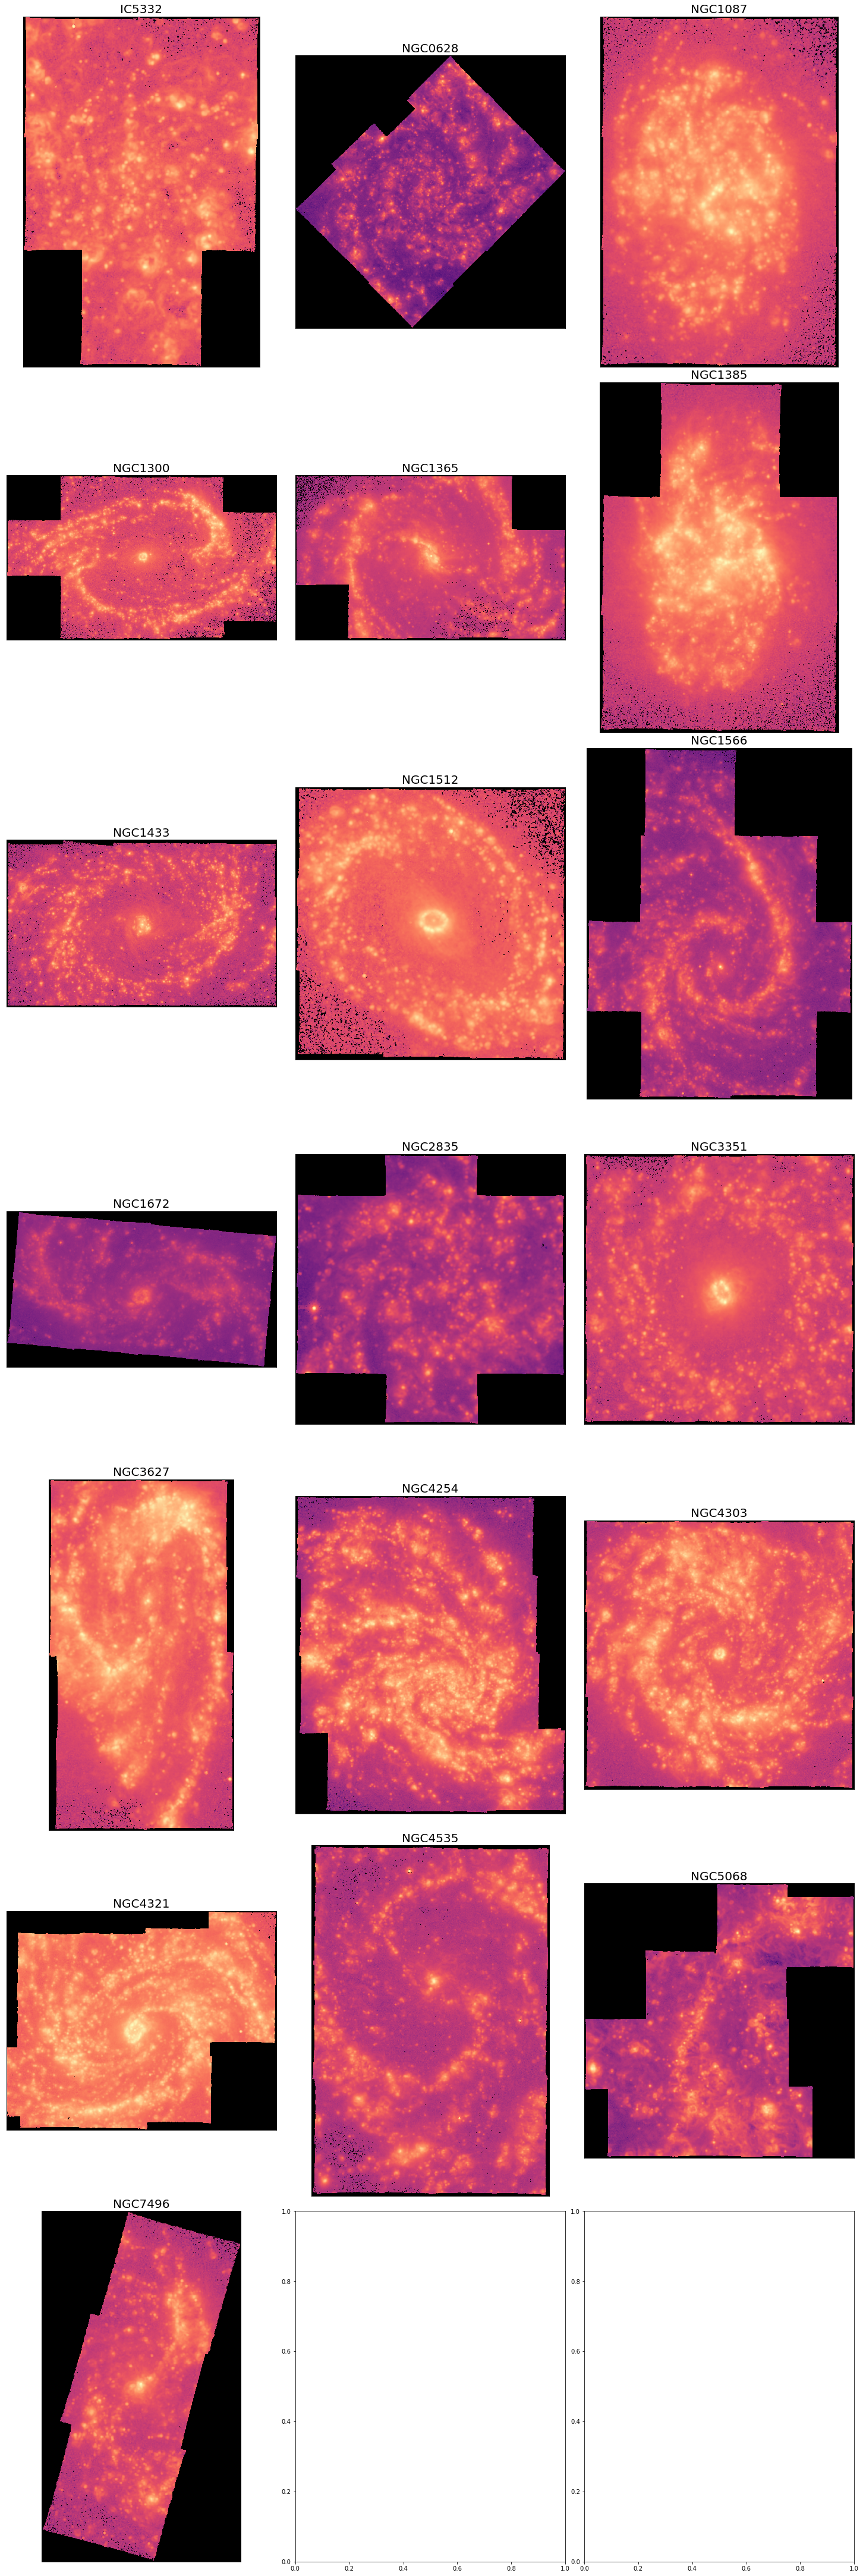

In [4]:
# set up plots & wcs information.
import matplotlib.pyplot as plt
from astropy.wcs import WCS
plots, wcss, hdus = [],[],[]

for i in range(len(MUSEtable)):
    fileName = MUSEtable["MUSEmapNat"][i]
    if os.path.isfile(fileName):
        MUSE_hdu = fits.open(fileName)
        hdus.append(MUSE_hdu)
        MUSE_map = MUSE_hdu["HA6562_FLUX"].data
        plots.append(MUSE_map)
        wcss.append(WCS(MUSE_hdu["HA6562_FLUX"].header, naxis=2))
    else:
        print("no file: ", fileName)

current_cmap = plt.get_cmap("magma")
current_cmap.set_bad("black")

# make multipanel plot of MUSE galaxies 
import math
i,j,m=0,0,0
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(len(plots)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 60))
for plot in plots:
    logplot = np.log10(plot)
    axs[i][j].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest")
    axs[i][j].set_title(MUSEtable["Galaxy"][m].upper(), fontsize=20)
    axs[i][j].set_xticks([])
    axs[i][j].set_yticks([])
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
    m+=1
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
fig.savefig("../Figures/AllMUSEGalaxies.png", dpi=300)
plt.close()

